In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [2]:
def js(p,q):
    p1 = p / np.linalg.norm(p,ord=1)
    q1 = q / np.linalg.norm(q,ord=1)
    m = 0.5 * (p+q)
    r = 0.5 * (st.entropy(p1,m)) + st.entropy(q1,m)
    return r

In [3]:
whData = pd.read_csv('weight-height.csv')
whData.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:
count, devision = np.histogram(whData['Height'],
                               bins=100)
count.mean()



100.0

In [5]:
norm = st.norm.rvs(size = len(whData['Height']),
                         loc = whData['Height'].mean(),
                         scale = whData['Height'].std())
icount, idevsion = np.histogram(norm,
                                bins=100)
icount.mean()

100.0

In [6]:
count = count / np.sum(count)


In [7]:
print(count)

[0.0001 0.0001 0.0001 0.0001 0.0001 0.0003 0.0002 0.0007 0.0001 0.0005
 0.0013 0.0011 0.0011 0.0011 0.002  0.0021 0.0024 0.0035 0.0032 0.004
 0.0045 0.0046 0.0068 0.0086 0.0077 0.0109 0.0113 0.0108 0.0121 0.0153
 0.0155 0.0163 0.0185 0.0177 0.019  0.0192 0.0198 0.0185 0.0235 0.0226
 0.019  0.0233 0.0231 0.0233 0.023  0.0191 0.0231 0.0201 0.0252 0.0204
 0.0227 0.0212 0.0211 0.0243 0.0215 0.0224 0.0228 0.0213 0.0172 0.0222
 0.0209 0.0197 0.0181 0.0162 0.0142 0.0176 0.0136 0.0145 0.013  0.0134
 0.0139 0.0106 0.0111 0.0086 0.0068 0.0057 0.0056 0.0047 0.0052 0.0043
 0.0033 0.0031 0.0024 0.0017 0.0015 0.0009 0.0011 0.0012 0.0003 0.0008
 0.0008 0.0005 0.0003 0.0002 0.0001 0.     0.0001 0.0001 0.0002 0.0001]


In [8]:
icount = icount / np.sum(icount)
print(icount)

[0.0001 0.     0.0002 0.     0.0003 0.0002 0.0004 0.0003 0.0008 0.0006
 0.0001 0.001  0.0012 0.0012 0.0016 0.0019 0.0024 0.0033 0.0032 0.003
 0.0066 0.0054 0.006  0.0081 0.0095 0.0088 0.0111 0.0124 0.0157 0.0145
 0.0174 0.0151 0.0195 0.0227 0.0212 0.0246 0.0282 0.0283 0.0286 0.0263
 0.0281 0.027  0.0306 0.0318 0.0313 0.0302 0.0299 0.0315 0.032  0.0308
 0.0284 0.0269 0.0273 0.0279 0.0217 0.0238 0.0205 0.0201 0.0178 0.014
 0.0153 0.0116 0.0137 0.0117 0.01   0.0077 0.0066 0.0078 0.005  0.0047
 0.0035 0.0037 0.0025 0.0026 0.0024 0.0018 0.0007 0.0006 0.0009 0.0007
 0.0009 0.0005 0.0001 0.0002 0.0005 0.0002 0.0003 0.0001 0.0001 0.
 0.     0.0001 0.     0.     0.     0.     0.     0.     0.     0.0001]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


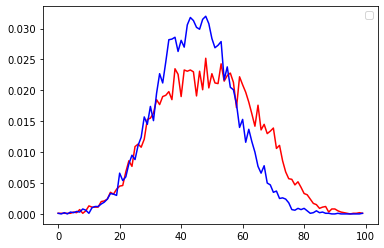

In [9]:
plt.plot(count,
            color='red')
plt.plot(icount,
            color='blue')
plt.legend()
plt.show()

In [10]:
js(count,icount)


0.04041362545916609

In [11]:
js(icount,count)

0.03668914226076886

In [12]:
wsData = pd.read_csv('wind_speed_laurel_nebraska.csv')
wsData.head(10)

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5
5,2.30,2001-06-11 11:50,25.2
6,2.46,2001-06-11 12:00,24.8
7,1.87,2001-06-11 12:10,24.0
8,1.71,2001-06-11 12:20,22.9
9,1.76,2001-06-11 12:30,17.9


In [13]:
count, devision = np.histogram(wsData['10 Min Sampled Avg'],
                               bins=100)

In [14]:
ideal = st.norm.rvs(size=len(wsData['10 Min Sampled Avg']),
                    loc=wsData['10 Min Sampled Avg'].mean(),
                    scale=wsData['10 Min Sampled Avg'].std())
icount, idevision = np.histogram(ideal,
                                 bins=100)

In [15]:
js(count,icount)

0.2862660077936213

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         3.,  2.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  3.,  2.,  3.,
         5.,  1.,  1.,  1.,  2.,  1.,  4.,  3.,  3., 11.,  6., 11.,  3.,
         9.,  4.,  1.,  6.,  4.,  4.,  3.,  5.,  1.,  4.,  3.,  1.,  3.,
         1.,  1.,  1.,  2.,  2.,  1.,  4.,  2.,  2.,  4.,  4.,  1.,  3.,
         2.,  2.,  1.,  3.,  0.,  6.,  7.,  1.,  5.,  5.,  2.,  3.,  1.,
         7.,  6.,  0.,  3.,  2.,  1.,  3.,  2.,  2.,  0.,  0.,  1.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 4.9  ,  5.178,  5.456,  5.734,  6.012,  6.29 ,  6.568,  6.846,
         7.124,  7.402,  7.68 ,  7.958,  8.236,  8.514,  8.792,  9.07 ,
         9.348,  9.626,  9.904, 10.182, 10.46 , 10.738, 11.016, 11.294,
        11.572, 11.85 , 12.128, 12.406, 12.684, 12.962, 13.24 , 13.518,
        13.796, 14.074, 14.352, 14.63 , 14.908, 15.186, 15.464, 15.742,
        16.02 , 16.298, 16.576, 16.854, 17.132, 17.41 , 17.688, 17.966,
  

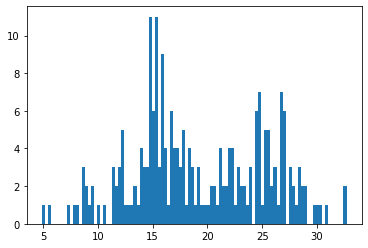

In [16]:
plt.hist(wsData['10 Min Sampled Avg'],bins=100)

In [17]:
sc.spatial.distance.jensenshannon(count,icount)

0.4342229004920049

In [18]:
sData = pd.read_csv('soccer.csv')
sData.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41630,2020-09-07,Albania,Lithuania,0,1,UEFA Nations League,Tirana,Albania,False
41631,2020-09-08,Belgium,Iceland,5,1,UEFA Nations League,Brussels,Belgium,False
41632,2020-09-08,Denmark,England,0,0,UEFA Nations League,Copenhagen,Denmark,False
41633,2020-09-08,France,Croatia,4,2,UEFA Nations League,Paris,France,False
41634,2020-09-08,Sweden,Portugal,0,2,UEFA Nations League,Stockholm,Sweden,False
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False
41639,2020-09-08,San Marino,Liechtenstein,0,2,UEFA Nations League,Rimini,Italy,True


In [19]:
sData['total_score'] = sData['home_score'] + sData['away_score']
sData.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,4
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,4
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,2
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,9
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,9


In [20]:
scount, sdevision = np.histogram(sData['total_score'],
                                 bins=100)

In [21]:
isData = st.norm.rvs(size=len(sData['total_score']),
                     loc=sData['total_score'].mean(),
                     scale=sData['total_score'].std())
iscount, isdvesion = np.histogram(isData,
                                  bins=100)

In [22]:
js(scount,iscount)

0.9973777233278861

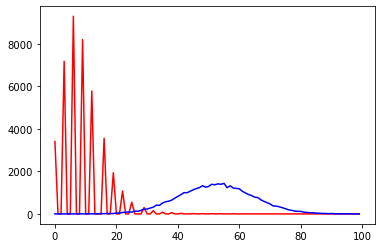

In [23]:
plt.plot(scount,
         color='red')
plt.plot(iscount,
         color='blue')

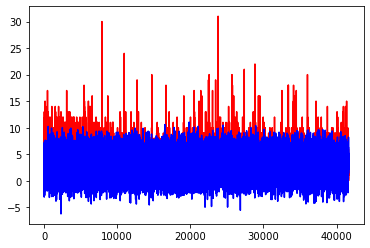

In [24]:
plt.plot(sData['total_score'],
         color='red')
plt.plot(isData,
         color='blue')

In [25]:
psData = st.distributions.poisson.rvs(size=len(sData['total_score']),
                                  mu=sData['total_score'].mean())
pscount, pddevision = np.histogram(psData,
                                   bins=100)

In [26]:
js(scount,pscount)

0.7811453926819074

In [27]:
usData = st.uniform.rvs(size=len(sData['total_score']),
                        loc=sData['total_score'].mean(),
                       scale=sData['total_score'].std())
uscount, usdevesion = np.histogram(usData,
                                   bins=100)

In [28]:
js(scount,uscount)

0.7676746828688514

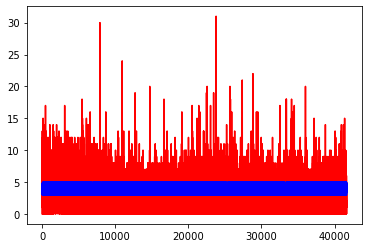

In [30]:
plt.plot(sData['total_score'],
         color='red')
plt.plot(usData,
        color='blue')